In [5]:
%run ../src/preprocess.py

D:\Codes\Python & Data Science Project\Aero-Guard\src\preprocess.py:11: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None, names=col_names)


✅ Data Loaded and RUL Calculated!
   unit_nr  time_cycles  RUL
0        1            1  191
1        1            2  190
2        1            3  189
3        1            4  188
4        1            5  187


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

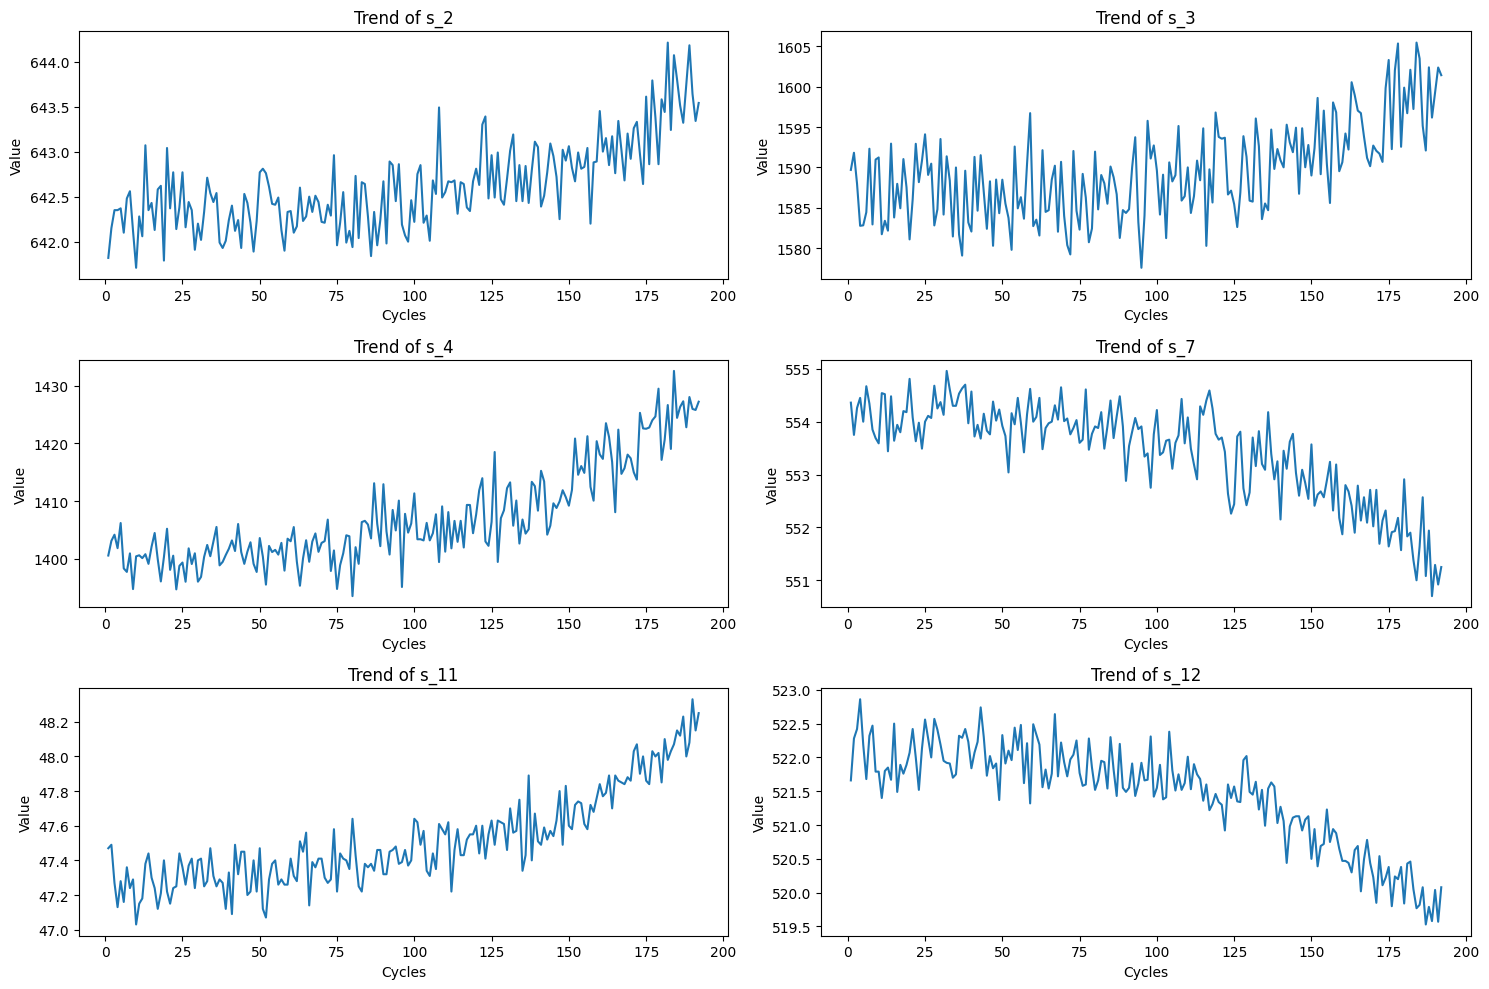

In [13]:
# Make sure the path points to where your CSV is saved
df = pd.read_csv('../data/processed_train.csv') 

# 2. Select a few interesting sensors to look at
# Based on NASA data, these usually show the most "wear and tear"
sensors_to_check = ['s_2', 's_3', 's_4', 's_7', 's_11', 's_12']

# 3. Let's look at Engine #1 specifically
engine_1 = df[df['unit_nr'] == 1]

# 4. Create the plot
plt.figure(figsize=(15, 10))

for i, sensor in enumerate(sensors_to_check, 1):
    plt.subplot(3, 2, i) # Create a grid of 3 rows and 2 columns
    plt.plot(engine_1['time_cycles'], engine_1[sensor])
    plt.title(f'Trend of {sensor}')
    plt.xlabel('Cycles')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

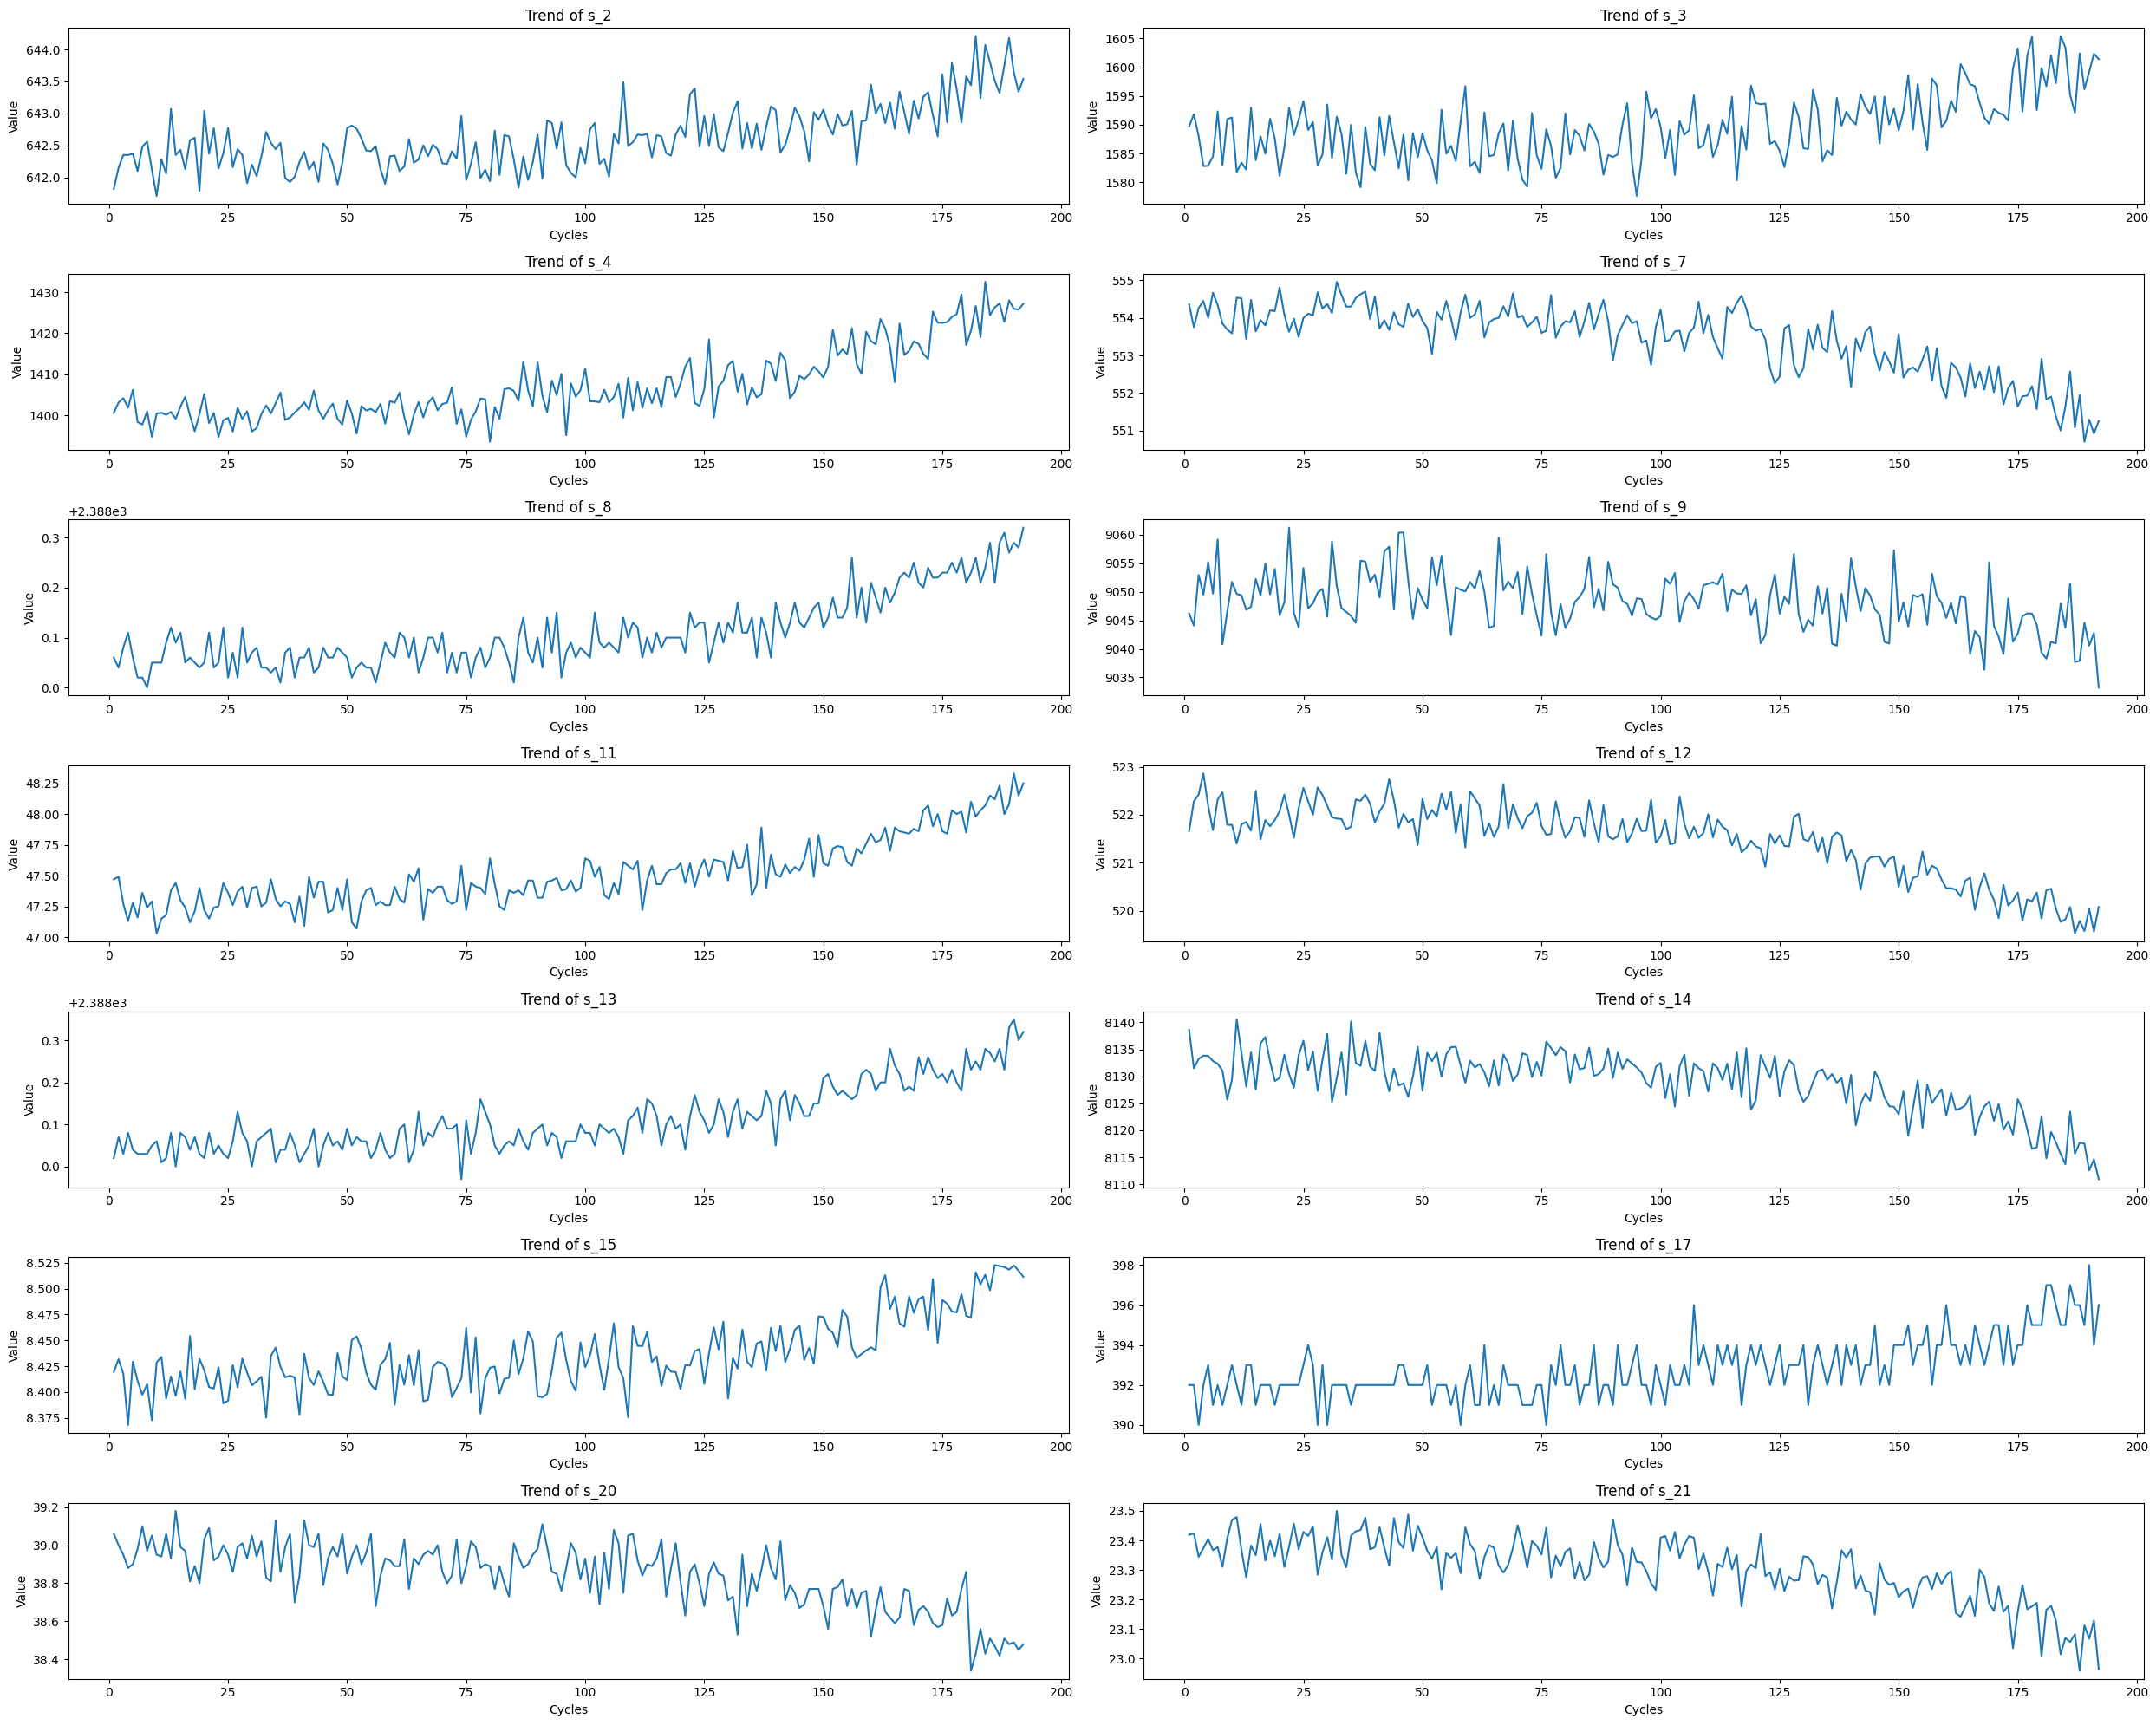

In [31]:
sensors_to_check = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']
engine_1 = df[df['unit_nr'] == 1]
plt.figure(figsize=(25, 20))

for i, sensor in enumerate(sensors_to_check, 1):
    plt.subplot(7, 2, i) 
    plt.plot(engine_1['time_cycles'], engine_1[sensor])
    plt.title(f'Trend of {sensor}')
    plt.xlabel('Cycles')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
moving_sensors = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']
# 2. Define the 'Window' (How many past cycles to look at)
window_size = 5 
# 3. Apply the Rolling Mean
# We use groupby('unit_nr') so the average of Engine 1 doesn't mix with Engine 2
df_rolling_mean = df.groupby('unit_nr')[moving_sensors].rolling(window=window_size).mean().reset_index(level=0, drop=True)
# 4. Rename columns so we know they are averages
df_rolling_mean.columns = [col + '_rolling_mean' for col in df_rolling_mean.columns]
# 5. Combine it back with your main data
df_final = pd.concat([df, df_rolling_mean], axis=1)
# 6. Clean up
# The first 4 rows of every engine will now have 'NaN' (empty) 
# because there weren't 5 previous cycles to average yet.
df_final = df_final.dropna()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20631 non-null  int64  
 1   time_cycles  20631 non-null  int64  
 2   setting_1    20631 non-null  float64
 3   setting_2    20631 non-null  float64
 4   setting_3    20631 non-null  float64
 5   s_1          20631 non-null  float64
 6   s_2          20631 non-null  float64
 7   s_3          20631 non-null  float64
 8   s_4          20631 non-null  float64
 9   s_5          20631 non-null  float64
 10  s_6          20631 non-null  float64
 11  s_7          20631 non-null  float64
 12  s_8          20631 non-null  float64
 13  s_9          20631 non-null  float64
 14  s_10         20631 non-null  float64
 15  s_11         20631 non-null  float64
 16  s_12         20631 non-null  float64
 17  s_13         20631 non-null  float64
 18  s_14         20631 non-null  float64
 19  s_15

In [40]:
df.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,5.329200e-15,...,0.071919,19.076176,0.037505,3.469531e-18,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


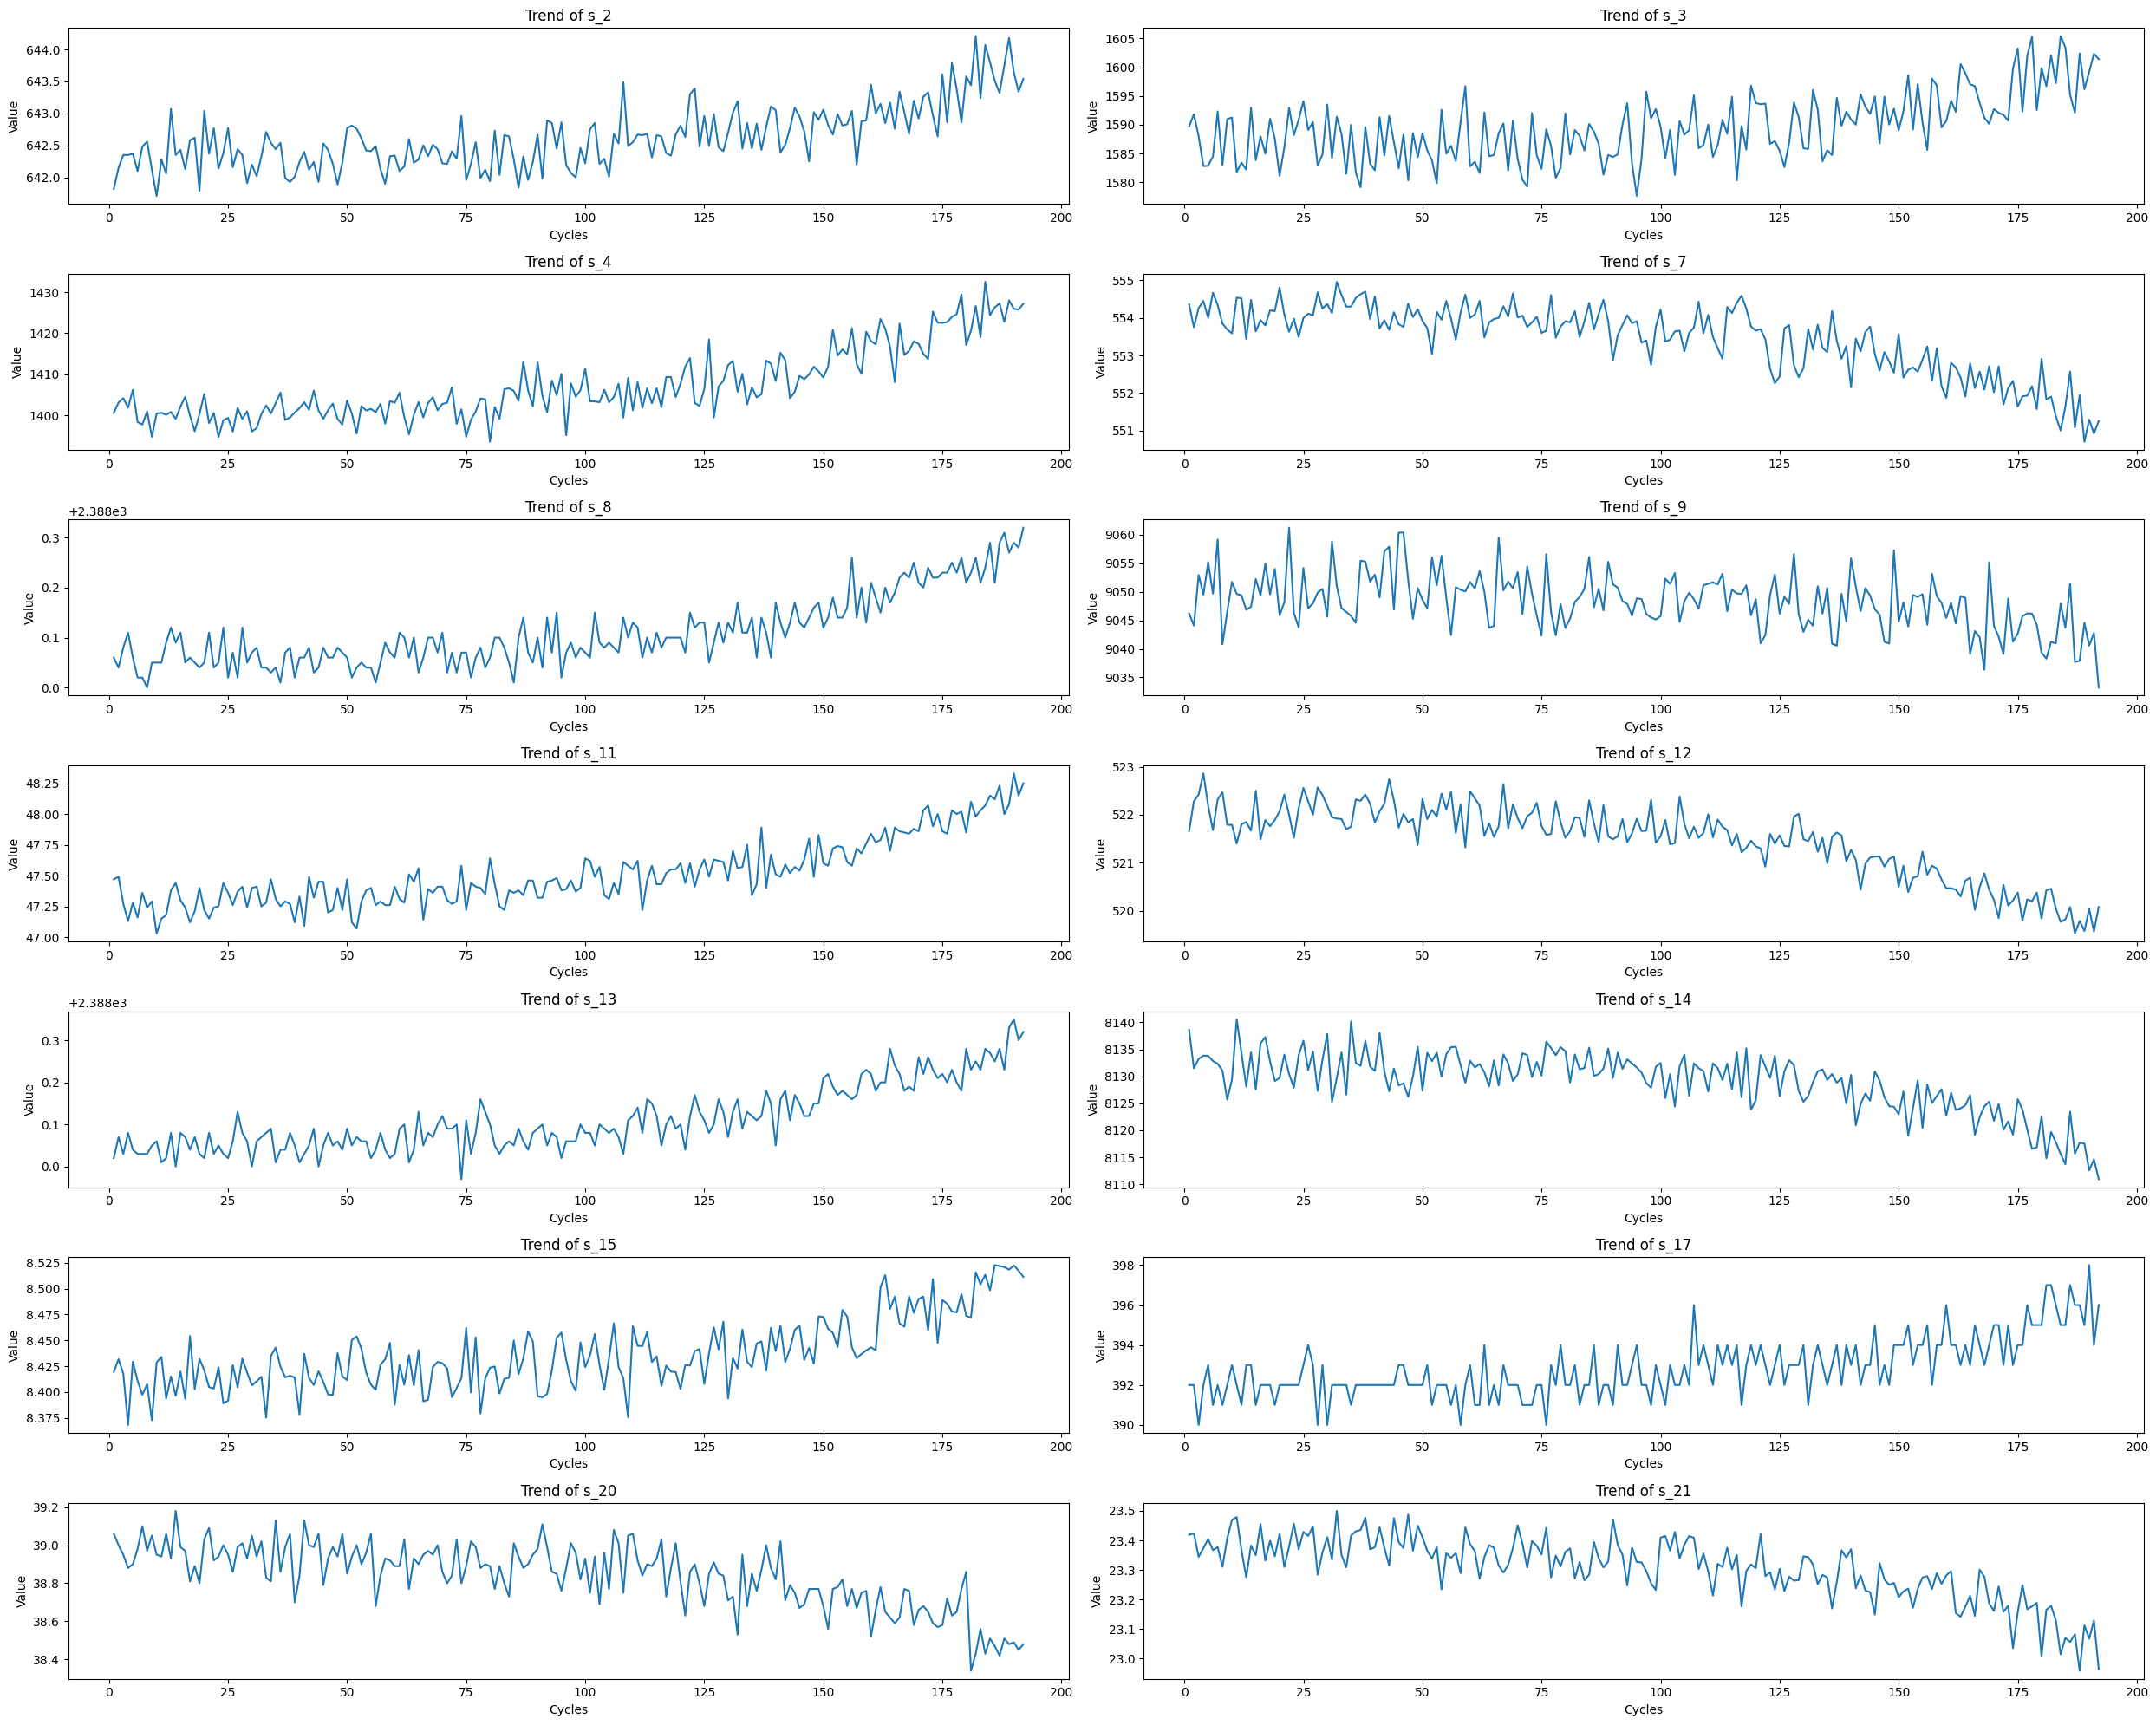

In [35]:
sensors_to_check = ['s_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']
engine_1 = df[df['unit_nr'] == 1]
plt.figure(figsize=(25, 20))

for i, sensor in enumerate(sensors_to_check, 1):
    plt.subplot(7, 2, i) 
    plt.plot(engine_1['time_cycles'], engine_1[sensor])
    plt.title(f'Trend of {sensor}')
    plt.xlabel('Cycles')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()